In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import numpy.matlib
from pylab import *
import scipy.special
import cmath

In [183]:
# Set the numerical parameters
RMin = 0.0
RMax = 10.0
RMatch = RMax
lOrbital = 2
Step = 0.1
Dim = (RMax-RMin)/Step

# Define your physical parameters
hc = 197.32705
beta = 0.0478450
Rws = 1.2 * 10.0**(0.3333) # This assumes that 10Be is independent from that other neutron
aws = 0.65
V0 = -61.1
E = 0.1

# Set your initial conditions
y0 = 0
yprime0 = 1

# Here we set up the harmonic oscillator potential
def f(R,v):
    F = np.matlib.zeros((2,2))
    F[0,1] = 1
    F[1,0] = lOrbital*(lOrbital+1)/(R*R) + beta * ( V0/(1+exp( (R-Rws)/aws )) - E);
    return F*v


In [184]:
# Define your Hankel functions in terms of the cylindrical Bessel functions
def F(l,r):
    return (math.pi*r/2)**(0.5)*scipy.special.jv(l,r)
def G(l,r):
    return -(math.pi*r/2)**(0.5)*scipy.special.yv(l,r)

def Hplus(l,r):
    return G(l,r) + 1j*F(l,r)
def Hminus(l,r):
    return G(l,r) - 1j*F(l,r)

# And also define their derivatives
def Fprime(l,r):
    return 0.5*(math.pi*r/2)**(-0.5)*scipy.special.jv(l,r) + (math.pi*r/2)**(0.5)*scipy.special.jvp(0, r, 1)
def Gprime(l,r):
    return -0.5*(math.pi*r/2)**(-0.5)*scipy.special.yv(l,r) - (math.pi*r/2)**(0.5)*scipy.special.yvp(0, r, 1)

def Hplusp(l,r):
    return Gprime(l,r) + 1j*Fprime(l,r)
def Hminusp(l,r):
    return Gprime(l,r) - 1j*Fprime(l,r)

In [185]:
# Runge-Kutta

# Start the algorithm with your initial conditions
y = np.matlib.zeros((2,int(Dim)))
y[0,0] = y0
y[1,0] = yprime0

r = np.linspace(RMin,RMax,Dim)

for i in xrange(1,int(Dim)):
#    print r[i]
    k1 = f(r[i],y[:,i-1])
    k2 = f(r[i] + Step/2, y[:,i-1] + Step/2*k1)
    k3 = f(r[i] + Step/2, y[:,i-1] + Step/2*k2)
    k4 = f(r[i] + Step, y[:,i-1] + Step*k3)
    y[:,i] = y[:,i-1] + Step/6 * (k1 + 2*k2 + 2*k3 + k4)
#    print k1, k2, k3, k4
#    print y


In [191]:
# Match the solution for r < RMatch (which you get from Runge-Kutta) to the asymptotic solution for r > RMatch
mat = np.zeros((2,2), dtype=complex)
mat[0,0] = y[0,int(Dim-1)]
mat[1,0] = y[1,int(Dim-1)]
mat[0,1] = Hplus(lOrbital, RMatch)
mat[1,1] = Hplusp(lOrbital, RMatch)

vec = np.zeros((2,1), dtype=complex)
vec[0,0] = Hminus(lOrbital, RMatch)
vec[1,0] = Hminusp(lOrbital, RMatch)


params = np.dot(np.linalg.inv(mat),vec)
cl = params[0,0] # This is the scaling factor to account for your derivative guess at R=0, such that u'(0)=cl*y'(0)
Sl = params[1,0] # This is your S-matrix value
print 'The S-matrix element is $S_L$ = ', Sl # See eqns 6.1.7 and 6.1.8 in Filomena's book for details
print 'which has magnitude', abs(Sl), 'and corresponds to a phase $\delta_L = $', 1/(2*1j)*cmath.log(Sl)

The S-matrix element is $S_L$ =  (0.703170898926+0.711020876559j)
which has magnitude 1.0 and corresponds to a phase $\delta_L = $ (0.395474482159+4.16333634234e-17j)


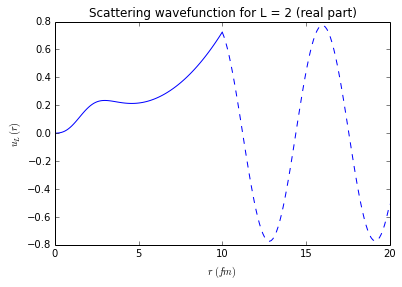

In [187]:
plt.plot(r, (cl*y.A[0,:]).real, 'b-')
plt.plot(r+RMatch, (Hminus(lOrbital,r+RMatch)-Sl*Hplus(lOrbital,r+RMatch)).real, 'b--')
plt.xlabel(r'$r\ (fm)$')
plt.ylabel(r'$u_L(r)$')
plt.title(r'Scattering wavefunction for L = %s (real part)' %(lOrbital))
#plt.savefig('realpart.pdf')
#plt.savefig('realpart.png')
plt.show()

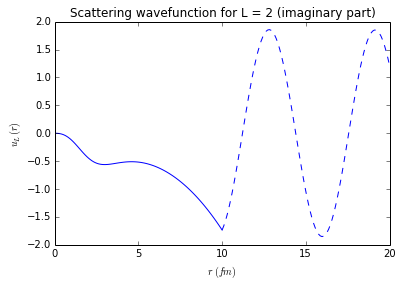

In [188]:
plt.plot(r, (cl*y.A[0,:]).imag, 'b-')
plt.plot(r+RMatch, (Hminus(lOrbital,r+RMatch)-Sl*Hplus(lOrbital,r+RMatch)).imag, 'b--')
plt.xlabel(r'$r\ (fm)$')
plt.ylabel(r'$u_L(r)$')
plt.title(r'Scattering wavefunction for L = %s (imaginary part)' %(lOrbital))
#plt.savefig('imagpart.pdf')
#plt.savefig('imagpart.png')
plt.show()

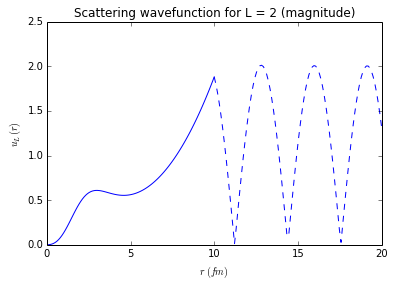

In [189]:
plt.plot(r, abs(cl*y.A[0,:]), 'b-')
plt.plot(r+RMatch, abs(Hminus(lOrbital,r+RMatch)-Sl*Hplus(lOrbital,r+RMatch)), 'b--')
plt.xlabel(r'$r\ (fm)$')
plt.ylabel(r'$u_L(r)$')
plt.title(r'Scattering wavefunction for L = %s (magnitude)' %(lOrbital))
#plt.savefig('magnitude.pdf')
#plt.savefig('magnitude.png')
plt.show()

In [190]:
print cl*y.A[0,int(Dim-1)]
print Hminus(lOrbital,RMatch)-Sl*Hplus(lOrbital,RMatch)

print cl*y.A[1,int(Dim-1)]
print Hminusp(lOrbital,RMatch)-Sl*Hplusp(lOrbital,RMatch)

(0.724453768782-1.7353478882j)
(0.724453768782-1.7353478882j)
(0.19350294804-0.463514646086j)
(0.19350294804-0.463514646086j)


In [148]:
cl*y.A

array([[  0.00000000e+00 +0.00000000e+00j,
          3.96004477e-19 +1.98002239e-19j,
          9.67009711e-19 +4.83504856e-19j,
          1.72022648e-18 +8.60113241e-19j,
          2.63534684e-18 +1.31767342e-18j,
          3.68292416e-18 +1.84146208e-18j,
          4.82813234e-18 +2.41406617e-18j,
          6.03265858e-18 +3.01632929e-18j,
          7.25625413e-18 +3.62812706e-18j,
          8.45820762e-18 +4.22910381e-18j,
          9.59877344e-18 +4.79938672e-18j,
          1.06405284e-17 +5.32026419e-18j,
          1.15496132e-17 +5.77480659e-18j,
          1.22968115e-17 +6.14840576e-18j,
          1.28584219e-17 +6.42921093e-18j,
          1.32168843e-17 +6.60844214e-18j,
          1.33611343e-17 +6.68056714e-18j,
          1.32866687e-17 +6.64333436e-18j,
          1.29953241e-17 +6.49766204e-18j,
          1.24947843e-17 +6.24739213e-18j,
          1.17978511e-17 +5.89892553e-18j,
          1.09215268e-17 +5.46076338e-18j,
          9.88596965e-18 +4.94298482e-18j,
          8